In [2]:
from matplotlib import pyplot as plt
import numpy as np

```{=typst}
#set text(
  font: ("Times New Roman", "LXGW WenKai"),
  size: 11pt,
)

由题意可得：

$
D(p(t)) = c - d p(t) \
S(q(t)) = D(p(t)) \
q(t + 1) -q(t) = r[p(t) -q(t)]
$

消去 $p(t)$ 可得：

$
q(t + 1) - q(t) = (r c) / d - r / c S(q(t)) - r q(t)
$

此即 $q(t)$ 的递推方程。
```

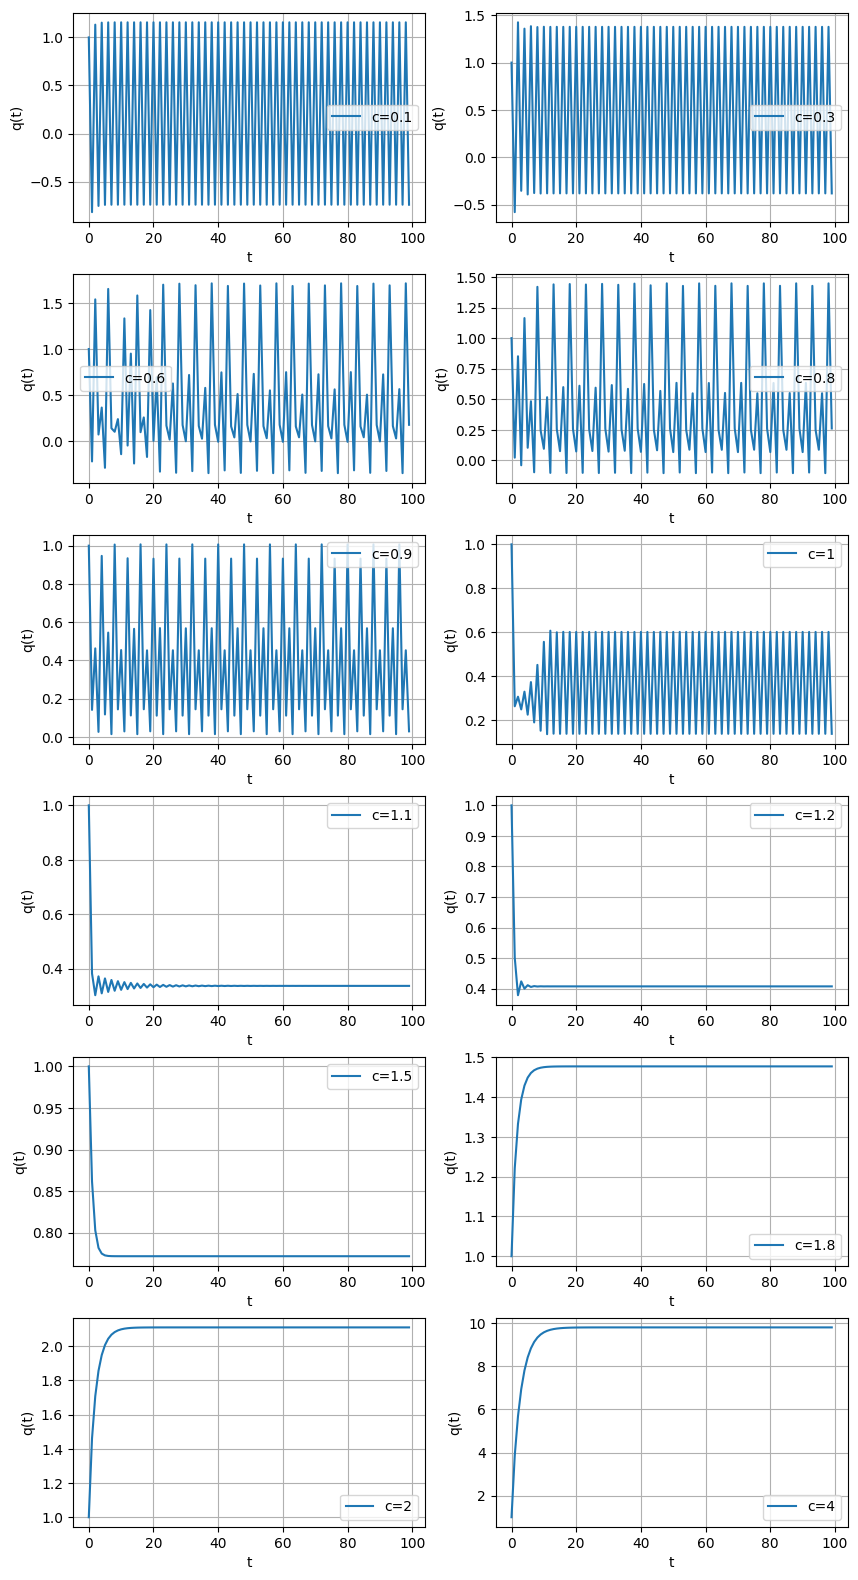

In [3]:
# 定义常量
const_mu = 4.8
const_d = 0.25
const_r = 0.3


# 定义函数
def S(_x):
  """
  供应函数
  :param _x = q(t)
  """
  return np.arctan(_x * const_mu)


len_x = 1000
arr_x = np.zeros((1, len_x))
arr_x[0, 0] = 1  # 假设 q(0) = 1，不影响收敛结果

lt_c = [0.1, 0.3, 0.6, 0.8, 0.9, 1, 1.1, 1.2, 1.5, 1.8, 2, 4]
len_c = len(lt_c)
dt_res = {}

for c in lt_c:
  for i in range(1, len_x):
    arr_x[0, i] = (1 - const_r) * arr_x[0, i - 1] + const_r * c / const_d - const_r * S(arr_x[0, i - 1]) / const_d
  dt_res[c] = arr_x.copy()


plt.figure(figsize=(10, 40))

for c in lt_c:
  plt.subplot(len_c, 2, lt_c.index(c) + 1)
  plt.plot(dt_res[c][0], label=f'c={c}')
  plt.legend()
  plt.grid()
  plt.xlabel('t')
  plt.ylabel('q(t)')
  plt.subplots_adjust(hspace=0.25)

plt.show()

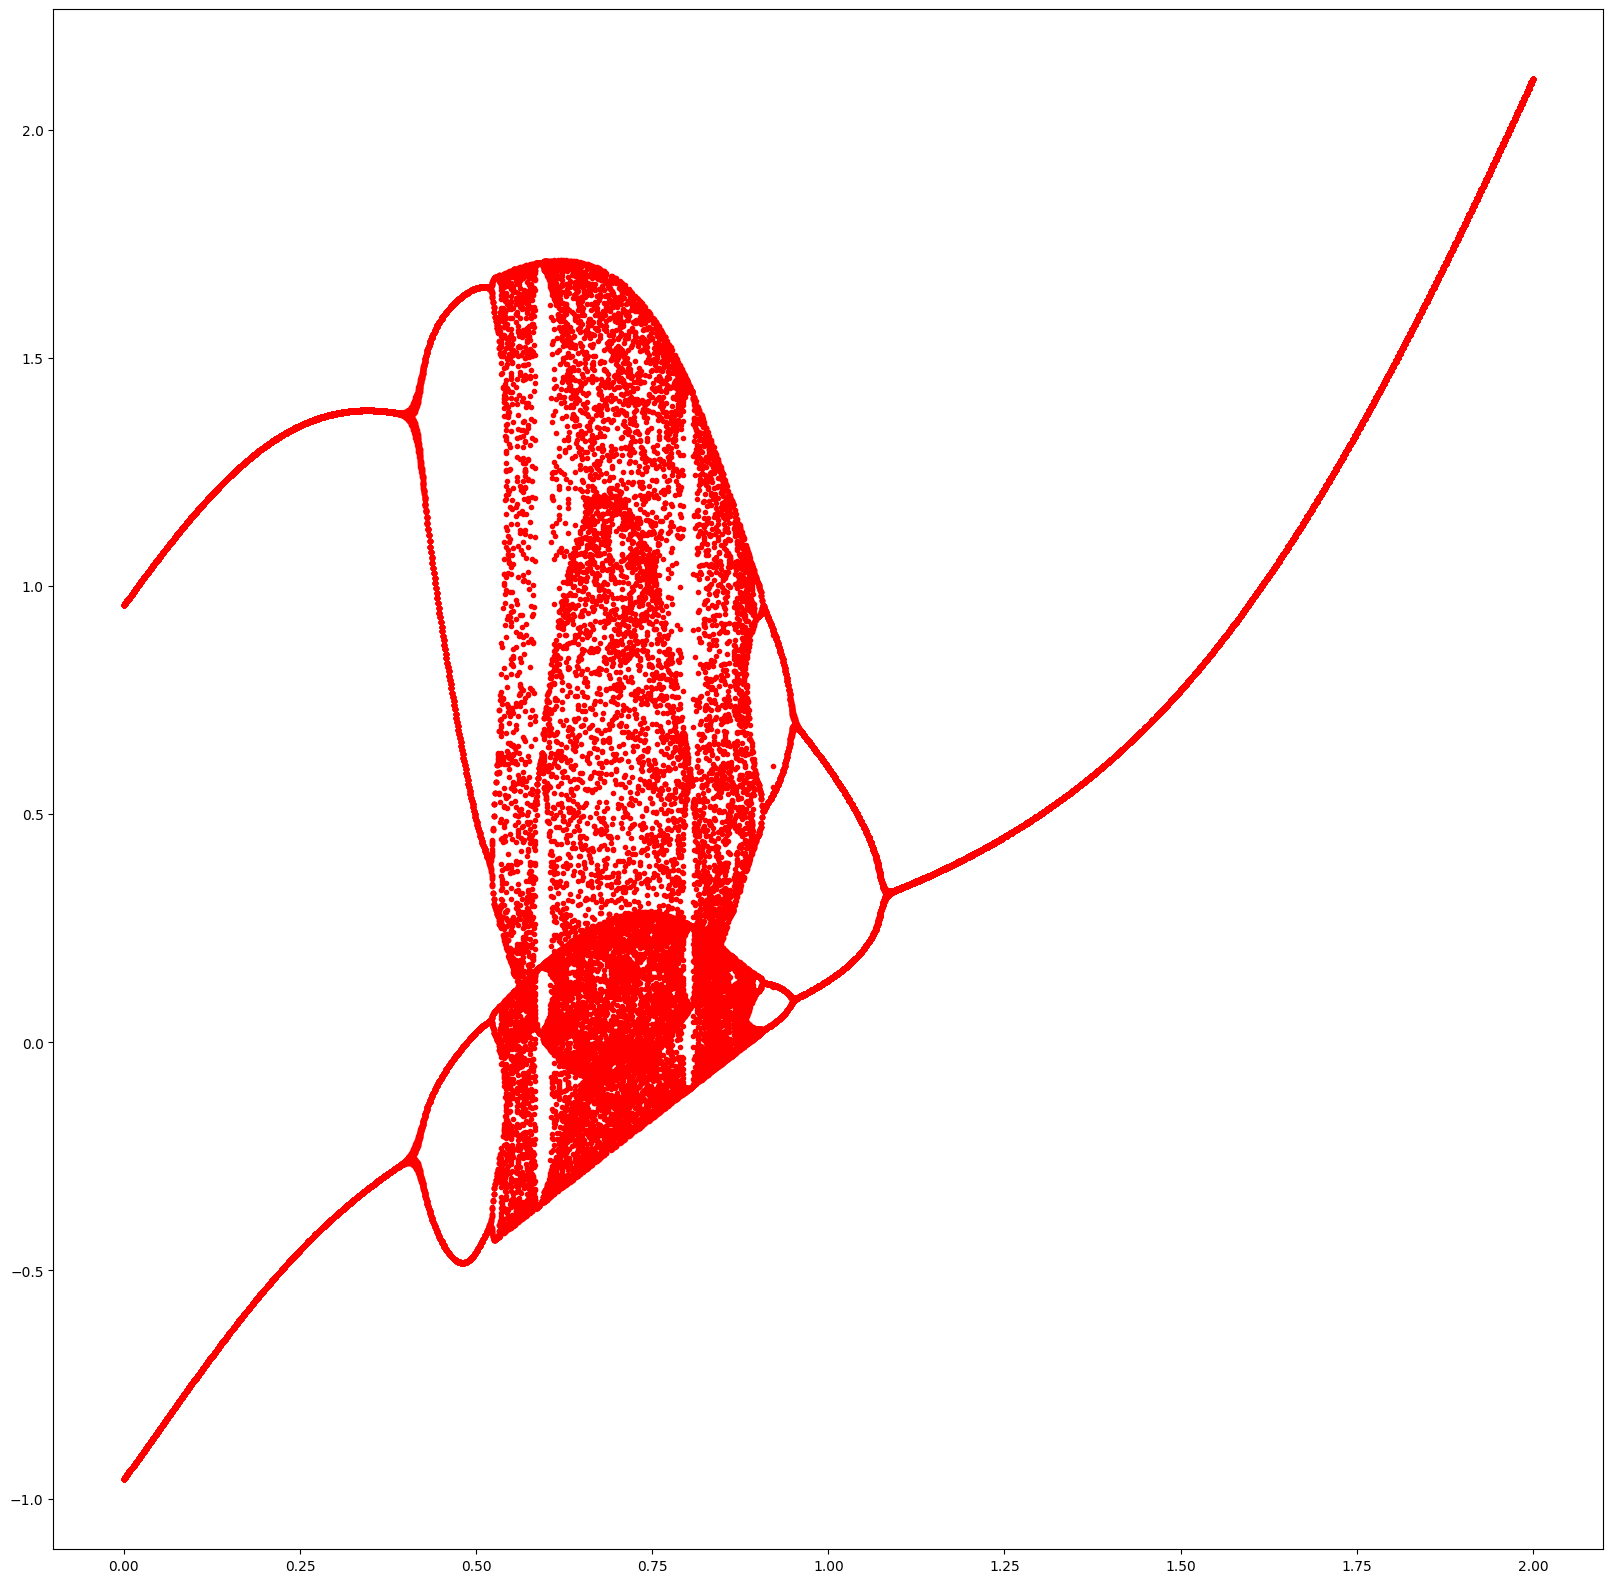

In [5]:
cc = np.linspace(0, 2, 2001)
interval_res = np.zeros((1, 401))

plt.figure(figsize=(20, 20))
for c in cc:
  for i in range(1, len_x):
    arr_x[0, i] = (1 - const_r) * arr_x[0, i - 1] + const_r * c / const_d - const_r * S(arr_x[0, i - 1]) / const_d
  for i in range(int(len_x / 2), len_x):
    plt.plot(c, arr_x[0, i], 'r.')

```{=typst}
#set text(
  font: ("Times New Roman", "LXGW WenKai"),
  size: 11pt,
)

结合 $q(t) - t$ 图像和 $q(t) - c$ 图像可知，随着 $c$ 的减小，出现混沌现象，同时，从 $q(t) - t$ 图像可知，在 $c$ 较小时，$q(t)$ 剧烈震荡，在 $c$ 接近零时，抖动频率大于采样频率，同时结合递推关系可知，反而稳定在极大值和极小值附近。
```